# Analysis of WebLight Transformation Dataset

Importing necessary modules.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np

'dataset.csv' is obtained by running parse.py on the downloaded webpages, Dataset mostly consists of count of different kind of tags that constitute html file. Dataset in total consists of 204 rows, first few are shown below

In [2]:
data = pd.read_csv('dataset.csv')
print(data.shape)
data.head()

(1983, 27)


,Name,Main Mobile size in bytes,Main Mobile All tags,Main Mobile Script tags,Main Mobile Image tags,Main Mobile Div tags,Main Mobile Hyperlink tags,Mini Mobile size in bytes,Mini Mobile all tags,Mini Mobile Script tags,...,Main Web Div tags,Main Web Hyperlink tags,Mini Web size in bytes,Mini Web all tags,Mini Web Script tags,Mini Web Image tags,Mini Web Div tags,Mini Web Hyperlink tags,Transcoded,Parsable
0,youtube.com,65216,92,9,3,32,8,0,0,0,...,261,12,0,0,0,0,0,0,0,True
1,facebook.com,104991,176,19,1,84,14,0,0,0,...,94,53,0,0,0,0,0,0,0,True
2,baidu.com,8815,55,6,2,9,18,48308,428,8,...,22,32,48308,428,8,51,245,26,1,True
3,wikipedia.org,75978,57,1,1,10,6,65760,880,9,...,10,6,65760,880,9,2,113,323,1,False
4,qq.com,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True


(array([694.,   1.,   0.,   0.,   0., 378., 447., 407.,   7.,  49.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <a list of 10 Patch objects>)

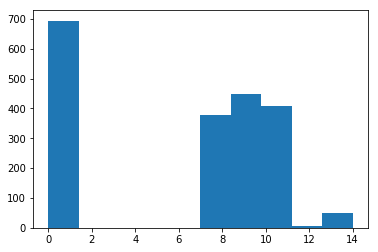

In [6]:
plt.hist(data['Mini Mobile Script tags'])

As you can observe last column is of transcoded variable, some pages cannot be transcoded by weblight. However, we have collected these web pages, because they will be useful in our implementation of neural network in later phases of project.
In the code below, transcoded pages have been separated from the dataset.

In [62]:
parsed = data[data['Parsable']==True]
transcoded = parsed[parsed['Transcoded']==1]
not_transcoded = parsed[parsed['Transcoded']==0]
pd.options.mode.chained_assignment = None  # default='warn'
transcoded = transcoded[transcoded['Main Mobile Div tags']!=0]
print(transcoded.shape)
transcoded

(868, 27)


,Name,Main Mobile size in bytes,Main Mobile All tags,Main Mobile Script tags,Main Mobile Image tags,Main Mobile Div tags,Main Mobile Hyperlink tags,Mini Mobile size in bytes,Mini Mobile all tags,Mini Mobile Script tags,...,Main Web Div tags,Main Web Hyperlink tags,Mini Web size in bytes,Mini Web all tags,Mini Web Script tags,Mini Web Image tags,Mini Web Div tags,Mini Web Hyperlink tags,Transcoded,Parsable
2,baidu.com,8815,55,6,2,9,18,48308,428,8,...,22,32,48308,428,8,51,245,26,1,True
7,yahoo.com,361031,1069,42,28,643,49,95416,1186,8,...,325,109,95420,1186,8,115,563,61,1,True
10,sohu.com,99826,919,10,19,222,318,145781,1073,9,...,319,507,145781,1073,9,33,368,341,1,True
13,jd.com,113504,398,19,0,62,136,27363,210,8,...,62,136,27359,210,8,13,113,38,1,True
18,360.cn,76274,1304,22,121,171,436,39118,428,8,...,171,436,39114,428,8,32,210,68,1,True
28,pages.tmall.com,6078,41,4,0,11,4,13599,56,7,...,39,15,13599,56,7,2,24,5,1,True
29,aliexpress.com,148314,666,31,0,130,90,88347,865,7,...,114,134,88344,865,7,99,605,84,1,True
33,csdn.net,11506,103,18,1,18,26,40932,367,9,...,456,392,40932,367,9,5,223,43,1,True
34,t.co,3367,27,1,1,2,13,14482,75,7,...,2,13,14482,75,7,2,24,15,1,True
38,ebay.com,110661,521,24,43,145,44,55831,634,8,...,278,289,55827,634,8,46,336,80,1,True


To see, how many changes weblight is making to the page, we are going to check four variables; number of script tags, image tags, number of divs and hyperlinks.

In [63]:
transcoded = transcoded[transcoded['Main Mobile All tags']!=0]

In [64]:
transcoded.shape

(868, 27)

In [65]:
transcoded['Scriptmain'] = transcoded['Main Mobile Script tags']/transcoded['Main Mobile All tags']
transcoded['Imagemain'] = transcoded['Main Mobile Image tags']/transcoded['Main Mobile All tags']
transcoded['Divmain'] = transcoded['Main Mobile Div tags']/transcoded['Main Mobile All tags']
transcoded['Hyperlinkmain'] = transcoded['Main Mobile Hyperlink tags']/transcoded['Main Mobile All tags']
transcoded['Scriptmini'] = transcoded['Mini Mobile Script tags']/transcoded['Mini Mobile all tags']
transcoded['Imagemini'] = transcoded['Mini Mobile Image tags']/transcoded['Mini Mobile all tags']
transcoded['Divmini'] = transcoded['Mini Mobile Div tags']/transcoded['Mini Mobile all tags']
transcoded['Hyperlinkmini'] = transcoded['Mini Mobile Hyperlink tags']/transcoded['Mini Mobile all tags']
transcoded['size_conversion'] = transcoded['Main Mobile size in bytes']/transcoded['Mini Mobile size in bytes']

In [66]:
transformations = pd.DataFrame(transcoded, columns=['Name','Scriptmain','Imagemain','Divmain','Hyperlinkmain','Scriptmini','Imagemini','Divmini','Hyperlinkmini','size_conversion','Main Mobile size in bytes','Mini Mobile size in bytes'])

In [67]:
def cdfplot(ser,t,x,y,l,h):
    ser = ser.sort_values()
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)
    ser_cdf.plot(drawstyle='steps')
    plt.title(t)
    plt.xlabel(x)
    plt.ylabel(y)
#     plt.xlim(l,h)
    plt.show()

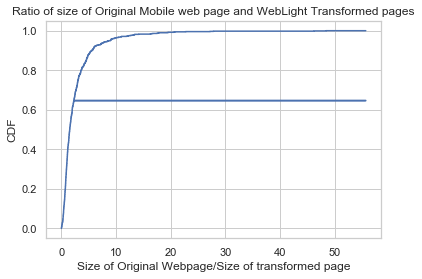

2.7356100331348308


In [56]:
title = "Ratio of size of Original Mobile web page and WebLight Transformed pages"
ylabel = 'CDF'
xlabel = 'Size of Original Webpage/Size of transformed page'
cdfplot(transformations['size_conversion'],title,xlabel,ylabel,0,1)
print(transformations['size_conversion'].mean())

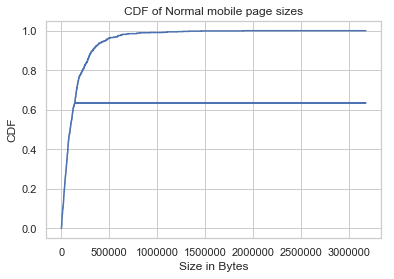

149546.04377880183


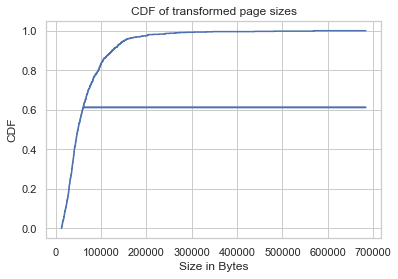

66046.61059907834


In [58]:
title = "CDF of Normal mobile page sizes"
ylabel = 'CDF'
xlabel = 'Size in Bytes'
cdfplot(transformations['Main Mobile size in bytes'],title,xlabel,ylabel,0,1)
print(transformations['Main Mobile size in bytes'].mean())
title = "CDF of transformed page sizes"
ylabel = 'CDF'
cdfplot(transformations['Mini Mobile size in bytes'],title,xlabel,ylabel,0,1)
print(transformations['Mini Mobile size in bytes'].mean())

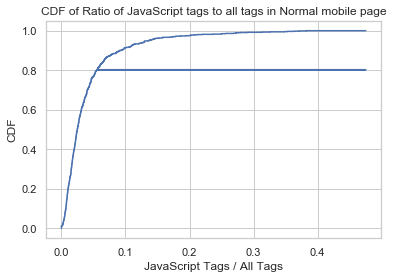

0.041504129131075984


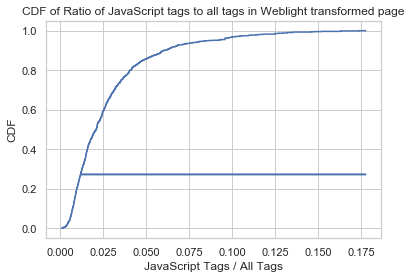

0.028868051854211523


In [59]:
title = "CDF of Ratio of JavaScript tags to all tags in Normal mobile page"
ylabel = 'CDF'
xlabel = 'JavaScript Tags / All Tags'
cdfplot(transformations['Scriptmain'],title,xlabel,ylabel,0,1)
print(transformations['Scriptmain'].mean())
title = "CDF of Ratio of JavaScript tags to all tags in Weblight transformed page"
cdfplot(transformations['Scriptmini'],title,xlabel,ylabel,0,1)
print(transformations['Scriptmini'].mean())

title = "CDF of Ratio of Image tags to all tags in Normal mobile page"
ylabel = 'CDF'
xlabel = 'Image Tags / All Tags'
cdfplot(transformations['Imagemain'],title,xlabel,ylabel,0,1)
title = "CDF of Ratio of Image tags to all tags in Weblight transformed page"
cdfplot(transformations['Imagemini'],title,xlabel,ylabel,0,1)

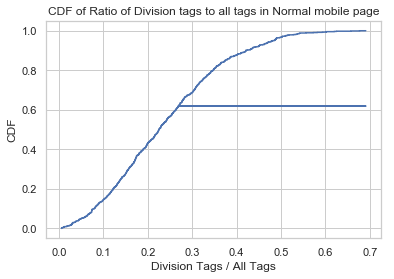

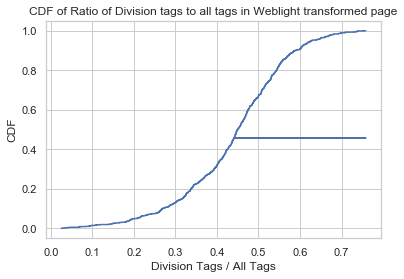

In [49]:
title = "CDF of Ratio of Division tags to all tags in Normal mobile page"
ylabel = 'CDF'
xlabel = 'Division Tags / All Tags'
cdfplot(transformations['Divmain'],title,xlabel,ylabel,0,1)
title = "CDF of Ratio of Division tags to all tags in Weblight transformed page"
cdfplot(transformations['Divmini'],title,xlabel,ylabel,0,1)

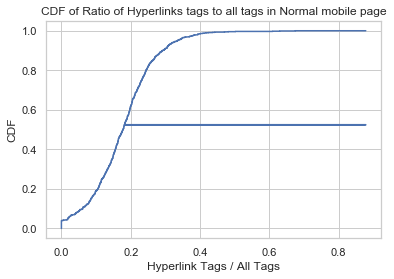

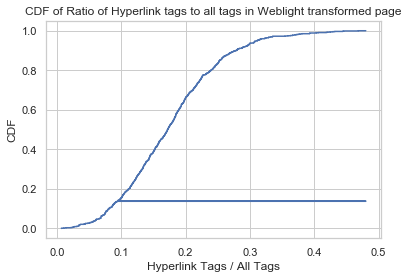

In [50]:
title = "CDF of Ratio of Hyperlinks tags to all tags in Normal mobile page"
ylabel = 'CDF'
xlabel = 'Hyperlink Tags / All Tags'
cdfplot(transformations['Hyperlinkmain'],title,xlabel,ylabel,0,1)
title = "CDF of Ratio of Hyperlink tags to all tags in Weblight transformed page"
cdfplot(transformations['Hyperlinkmini'],title,xlabel,ylabel,0,1)

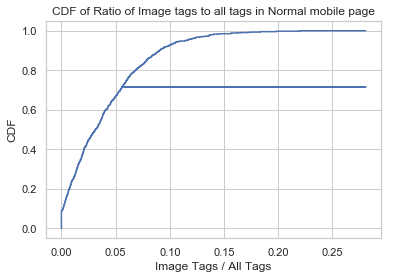

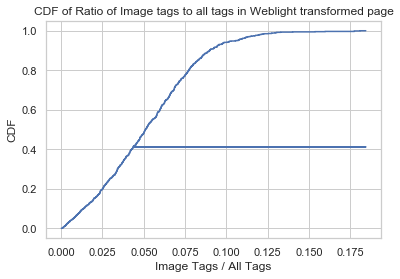

In [70]:
title = "CDF of Ratio of Image tags to all tags in Normal mobile page"
ylabel = 'CDF'
xlabel = 'Image Tags / All Tags'
cdfplot(transformations['Imagemain'],title,xlabel,ylabel,0,1)
title = "CDF of Ratio of Image tags to all tags in Weblight transformed page"
cdfplot(transformations['Imagemini'],title,xlabel,ylabel,0,1)